In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import random
import torch
from torchvision import transforms as T
import torch.nn.functional as F
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Model Inference

In [2]:
bird_class_map = {
    0: "Black Stilt",
    1: "Bonelli’s Eagle",
    2: "Brahminy Kite",
    3: "Common Bronzewing",
    4: "Common Myna",
    5: "Great Tit",
    6: "Hill Pigeon",
    7: "Himalayan Bulbul",
    8: "Himalayan Griffon",
    9: "House Sparrow",
    10: "Indian Vulture",
    11: "Jungle Owlet",
    12: "Long-billed Crow",
    13: "Magpie Robin",
    14: "Red-billed Magpie",
    15: "White-crested Laughingthrush"
}

bird_class_map_short = {
    "blasti": "Black Stilt",
    "bonegl": "Bonelli’s Eagle",
    "brhkyt": "Brahminy Kite",
    "cbrtsh": "Common Bronzewing",
    "cmnmyn": "Common Myna",
    "gretit": "Great Tit",
    "hilpig": "Hill Pigeon",
    "himbul": "Himalayan Bulbul",
    "himgri": "Himalayan Griffon",
    "hsparo": "House Sparrow",
    "indvul": "Indian Vulture",
    "jglowl": "Jungle Owlet",
    "lbicrw": "Long-billed Crow",
    "mgprob": "Magpie Robin",
    "rebimg": "Red-billed Magpie",
    "wcrsrt": "White-crested Laughingthrush"
}


image 1/1 /home/alex-kravchuk/MyCodeProjects/MA_lab3/bird-dataset/val/cbrtsh/_D32_10311.jpg: 224x224 cbrtsh 0.26, himgri 0.11, hsparo 0.08, cmnmyn 0.07, lbicrw 0.07, 1.1ms
Speed: 15.7ms preprocess, 1.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/alex-kravchuk/MyCodeProjects/MA_lab3/bird-dataset/val/himgri/IMG_5387.JPG: 224x224 himgri 0.57, indvul 0.21, blasti 0.04, bonegl 0.03, brhkyt 0.03, 1.1ms
Speed: 60.3ms preprocess, 1.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/alex-kravchuk/MyCodeProjects/MA_lab3/bird-dataset/val/indvul/_DSC8754.jpg: 224x224 indvul 0.45, himgri 0.17, blasti 0.06, bonegl 0.05, hsparo 0.05, 1.1ms
Speed: 77.9ms preprocess, 1.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /home/alex-kravchuk/MyCodeProjects/MA_lab3/bird-dataset/val/cmnmyn/DSC_7625.jpg: 224x224 hsparo 0.39, rebimg 0.13, himbul 0.09, wcrsrt 0.08, himgri 0.07, 1.0ms
Speed: 11.9ms preproces

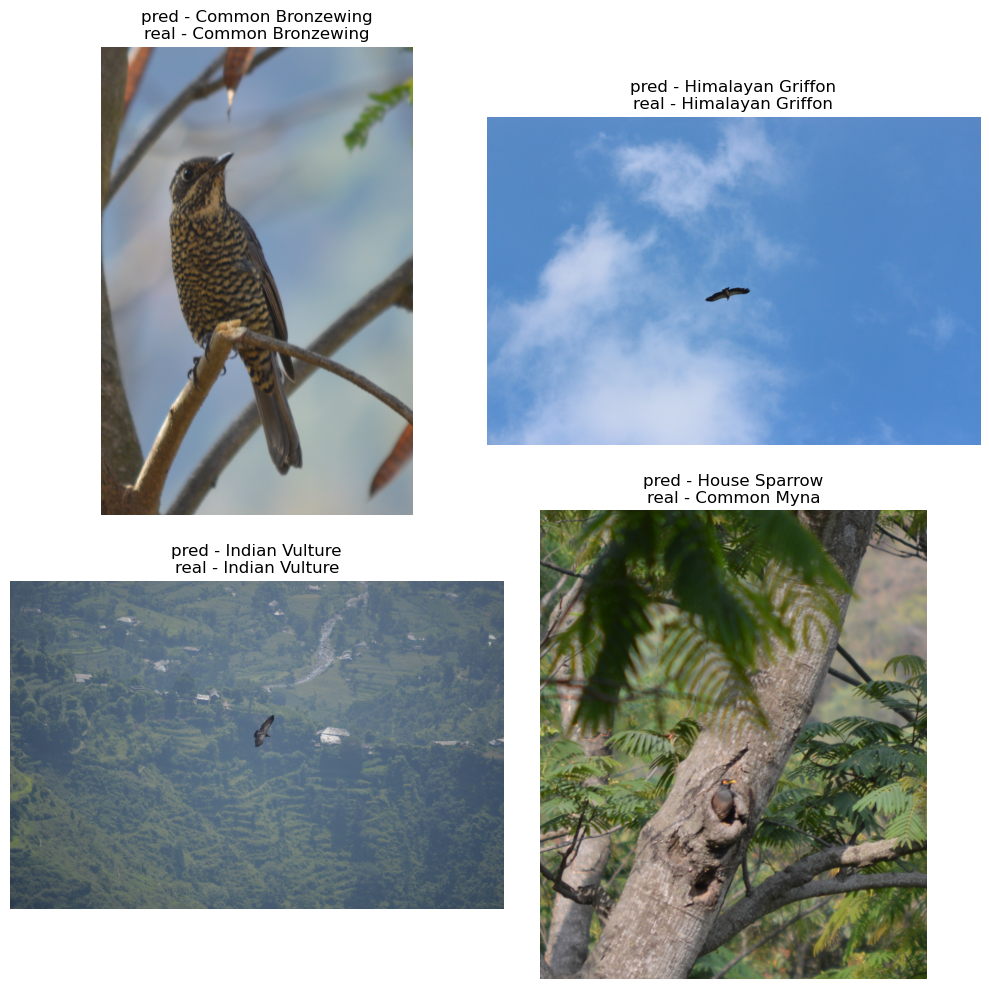

In [3]:
test_dir = 'bird-dataset/val'
model = YOLO('best.pt')
model = model.to(device)

all_images = []
for cls in os.listdir(test_dir):
    cls_path = os.path.join(test_dir, cls)
    if not os.path.isdir(cls_path):
        continue
    imgs = [os.path.join(cls_path, img) for img in os.listdir(cls_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    for img in imgs:
        all_images.append((img, cls))

samples = random.sample(all_images, 4)

plt.figure(figsize=(10, 10))

for idx, (img_path, real_cls) in enumerate(samples):

    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    result = model(img_path, task='classify', imgsz=224)
    pred_idx = int(result[0].probs.top1)
    pred_label = bird_class_map[pred_idx]
    real_label = bird_class_map_short[real_cls]

    plt.subplot(2, 2, idx + 1)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f'pred - {pred_label}\nreal - {real_label}', fontsize=12)

plt.tight_layout()
plt.show()